In [12]:
import io
import base64
import numpy as np
import time
import SimpleITK as sitk
import sys
import json

import imageio
import nibabel as nib
import matplotlib.pyplot as plt
import cv2



In [1]:
def my_dice(img1_np,img2_np): 
    # print('image1(roi) dtype', type(img1))
    # print('image2(inference) dtype', type(img2))

    # convert to numpy array
    # img1_np = np.array(img1)
    # img2_np = np.array(img2)

    # img2_bytes = img2_np.tobytes()
    img1_float64 = img1_np.astype('float64')
    intersection = np.logical_and(img1_float64, img2_np)

    # print('image1(roi) converted dtype', type(img1_float64))

    union = np.logical_or(img1_float64, img2_np) 
    dice = (2*np.sum(intersection))/(np.sum(union)+np.sum(intersection)) 
    return dice


In [34]:
def binary_segmentation_from_png(png_path):
    # Load PNG image
    img = cv2.imread(png_path)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define the lower and upper HSV values for the red color
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])

    img_mask = cv2.inRange(img_hsv, lower_red, upper_red)

    # Dimensions are slightly off by 1, so I add padding: ValueError: operands could not be broadcast together with shapes (1460,1714) (1459,1713) 
    img_mask_padded = np.pad(img_mask, ((0, 1), (0, 1)), mode='constant', constant_values=0)

    
    
    return img_mask_padded

# Specify the paths to the PNG and NIfTI files
nii_path = 'SSA003_OS_Scan4_2.pngred.pngout_0000.nii.gz'
png_path = 'SSA003_OS_Scan4_2_IRIS_a.png'

# Load the binary segmentation from the PNG file
png_binary_seg = binary_segmentation_from_png(png_path)

# Load the binary segmentation from the NIfTI file
nii_img = nib.load(nii_path)

# Get NIfTI data
# nii_data = nii_img.get_fdata()
nii_data = nii_img.dataobj

# Rotate NIfTI data 90 degrees to the right, to align with original image 
nii_data_rotated = np.rot90(nii_data, k=1, axes=(1, 0))

# Mirror NIfTI data across the y-axis, to align with original image 
nii_data_mirrored = np.fliplr(nii_data_rotated)

nii_binary_seg = np.squeeze(nii_data_mirrored)





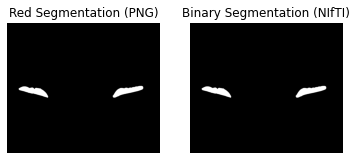

In [35]:
plt.subplot(1, 2, 1)
plt.imshow(png_binary_seg, cmap='gray')
plt.title('Red Segmentation (PNG)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(nii_binary_seg, cmap='gray')
plt.title('Binary Segmentation (NIfTI)')
plt.axis('off')

plt.show()

In [36]:
dice_score = my_dice(nii_binary_seg, png_binary_seg)

# Print the Dice score
print(f"Dice Score: {dice_score}")

Dice Score: 1.0
